In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Reading the dataset
titanic_dataset = pd.read_csv('titanic.csv')

In [3]:
# Printing the first five rows of the dataset
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Filling missing values for age
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace=True)

In [6]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 640x480 with 0 Axes>

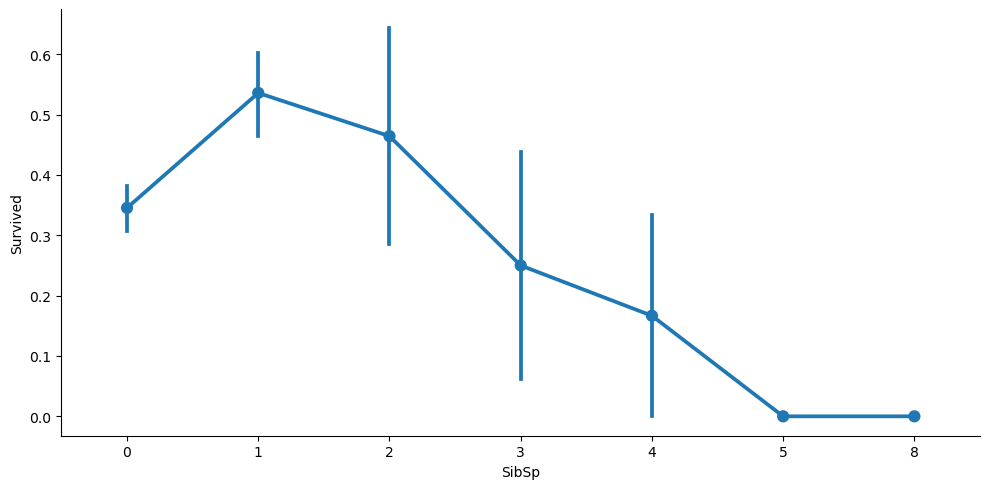

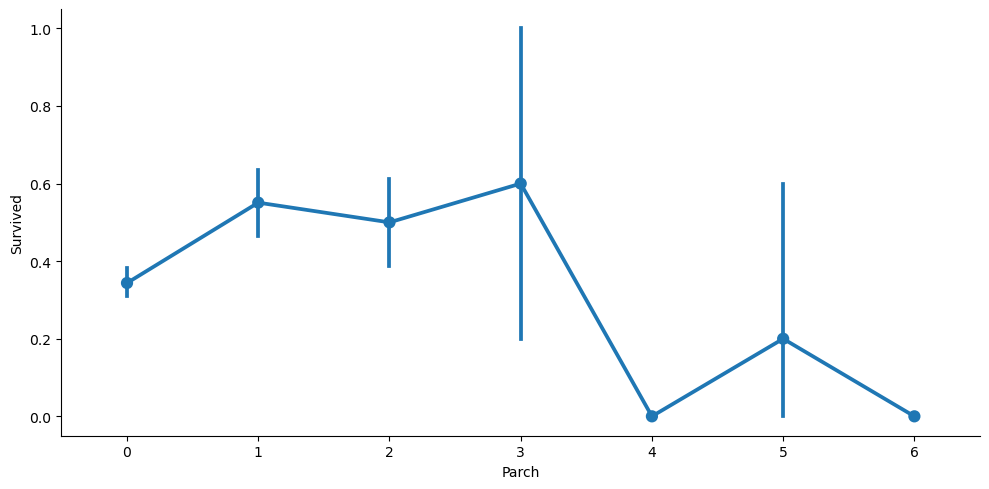

In [7]:
# SibSp, Parch column plot distribution
for index, columns in enumerate(['SibSp', 'Parch']):
    plt.figure(index)
    sns.catplot(x=columns, y='Survived', data=titanic_dataset, kind='point',aspect=2)  
    

In [8]:
## FamilyCount
titanic_dataset['FamilyCount'] = titanic_dataset['SibSp'] + titanic_dataset['Parch']

In [9]:
## Drop unnecessary columns

In [10]:
## Drop the unnecessary columns that can represent high collinearity
titanic_dataset.drop(['PassengerId', 'SibSp', 'Parch'],axis=1,inplace=True)

In [11]:
# Printing the first head of the dataset
titanic_dataset.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


In [12]:
titanic_dataset.to_csv('../simplified_titanic.csv', index=False)

In [13]:
import pandas as pd
import numpy as np

In [14]:
simplified_titanic = pd.read_csv('../simplified_titanic.csv')

In [15]:
simplified_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


## Cleaning the Discrete Variables

In [16]:
## Cleaning cabin column
simplified_titanic['CabinIndicator'] = np.where(simplified_titanic['Cabin'].isnull(), 0, 1)

In [17]:
simplified_titanic

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,CabinIndicator
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,NaN,S,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C148,C,0,1


In [18]:
## Converting Sex into numeric 
gender_map = {'male': 0, 'female':1}

In [19]:
simplified_titanic['Sex'] = simplified_titanic['Sex'].map(gender_map)

In [20]:
simplified_titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,CabinIndicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [21]:
## Dropping unnecessary variables
simplified_titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [22]:
simplified_titanic.head(5)

,Survived,Pclass,Sex,Age,Fare,FamilyCount,CabinIndicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [23]:
## Writing out the cleaned data
simplified_titanic.to_csv('../simplified_titanic.csv', index=False)

In [24]:
## Splitting the dataset into training, test and validation set
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
cleaned_titanic = pd.read_csv('../simplified_titanic.csv')

In [26]:
cleaned_titanic.head(5)

,Survived,Pclass,Sex,Age,Fare,FamilyCount,CabinIndicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [27]:
## Separating out the features and target
features = cleaned_titanic.drop('Survived', axis=1)
labels = cleaned_titanic['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.4, random_state=234)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=134)

for dataset in [Y_train, Y_val, Y_test]:
    print(round(len(dataset)/len(labels), 2))
    

0.6
0.2
0.2


In [28]:
## Write data out
X_train.to_csv('../train_features.csv', index=False)
X_val.to_csv('../validation_features.csv', index=False)
X_test.to_csv('../test_features.csv', index=False)

Y_train.to_csv('../../train_labels.csv', index=False)
Y_val.to_csv('../../validation_labels.csv', index=False)
Y_test.to_csv('../../test_labels.csv', index=False)

In [29]:
## Fitting a model using cross validation
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
tr_features = pd.read_csv('../train_features.csv')
tr_labels = pd.read_csv('../../train_labels.csv', header=None)

In [32]:
print(tr_features.shape)
print(tr_labels.shape)

(534, 6)
(535, 1)


In [ ]:
model = RandomForestClassifier()

In [ ]:
scores = cross_val_score(model,tr_features,tr_labels.values.ravel(),cv=8)